In [14]:
#! pip install plotly

## Ejercicio breast cancer de sklearn
1. Carga el dataset [breast_cancer de `sklearn`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html)
2. Limpia los datos si es necesario
3. Dibuja con plotly los gráficos que creas necesarios para entender los datos.
4. Utiliza los métodos de clasificación vistos hasta ahora para clasificar el target de los datos, ¿cuál da mejores resultados? 
5. Intenta superarte en el score cambiando las features de los algoritmos.

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle

import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedKFold

In [16]:
cancer = datasets.load_breast_cancer()

In [17]:
print("Features: ", cancer.feature_names)

print("Labels: ", cancer.target_names)

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']


In [18]:
# print the cancer labels (0:malignant, 1:benign)
# print(cancer.target)

In [19]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [20]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [21]:
cancer_df = pd.DataFrame(data= np.c_[cancer.data, cancer.target],
                     columns= list(cancer.feature_names) + ['target'] )

In [22]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

**2. Limpia los datos si es necesario**

Estos datos ya han sido tratados y preparados por `sklearn`, no se observan datos nulos, ni duplicados, todos los datos son numéricos y están bien nombrados. No creo que sea necesaria más limpieza.

- https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html
- https://scikit-learn.org/stable/datasets/index.html#breast-cancer-dataset

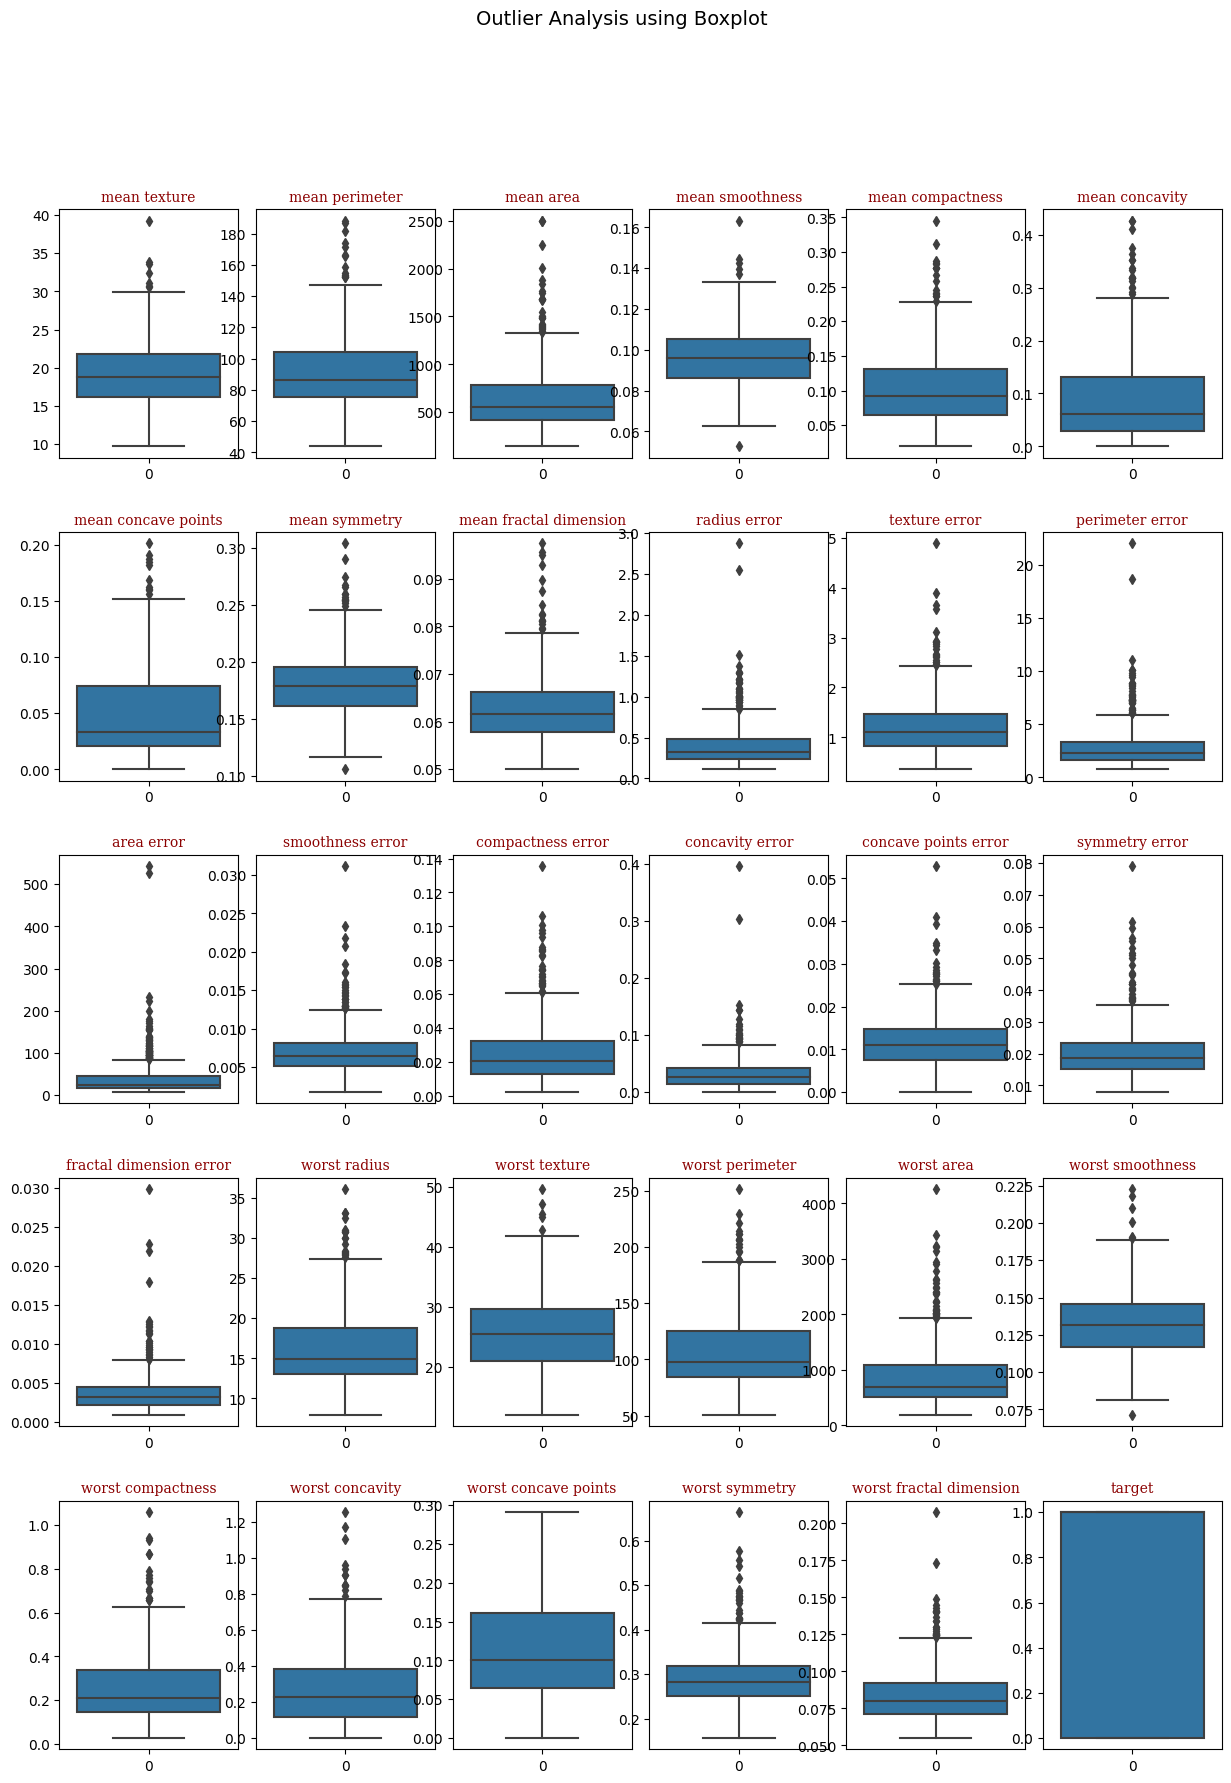

In [29]:
numerical_features = cancer_df.columns[1:]
fig,axes = plt.subplots(5, 6, figsize = (15, 20))
fig.subplots_adjust(wspace = 0.1, hspace = 0.3)
fig.suptitle('Outlier Analysis using Boxplot', fontsize = 14)
axes = axes.ravel()
font = {
    'family': 'serif',
    'color':  'darkred',
    'weight': 'normal',
    'size': 10, }
for i,col in enumerate(numerical_features):
    sns.boxplot(cancer_df[col], ax = axes[i])
    axes[i].set_title(col, fontdict = font, fontsize = 10)  

In [31]:
# Calculate the outlier values for each feature.
def detect_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - (1.5 * IQR)
    upper_limit = Q3 + (1.5 * IQR)
    outliers = df[(df[col] < lower_limit) | (df[col] > upper_limit)]
    
    if len(outliers) == 0:
        return 'No Outliers Present'
    else:
        return outliers

# Outliers values are --
for col in numerical_features:
    print('-' * 27, col,'-' * 26)
    print(detect_outliers(cancer_df, col))
    print('\n')    

--------------------------- mean texture --------------------------
     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
239        17.46         39.28           113.4      920.6          0.09812   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
239            0.1298          0.1417              0.08811         0.1809   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
239                 0.05966  ...          44.87            141.2      1408.0   

     worst smoothness  worst compactness  worst concavity  \
239            0.1365             0.3735           0.3241   

     worst concave points  worst symmetry  worst fractal dimension  target  
239                0.2066          0.2853                  0.08496     0.0  

[1 rows x 31 columns]


--------------------------- mean perimeter --------------------------
No Outliers Present


--------------------------- mean area --------------------------


**3. Dibuja con plotly los gráficos que creas necesarios para entender los datos.**

In [32]:
mean_col = []
error_col = []
worst_col = []
area_col = []

for col in cancer_df.columns.tolist():
    if "area" in col:
        area_col.append(col)
    else:
        if col[:4] == "mean":
            mean_col.append(col)
        elif col[-5:] == "error":
            error_col.append(col)
        elif col[:5] == "worst":
            worst_col.append(col)

In [33]:
print(f"Divido las features en diferentes listas para hacer más fácil el estudio de estas:\n\n\
mean_col:\n{mean_col}\n\nerror_col:\n{error_col}\n\nworst_col:\n{worst_col}\n\narea_col:\n{area_col}")

Divido las features en diferentes listas para hacer más fácil el estudio de estas:

mean_col:
['mean radius', 'mean texture', 'mean perimeter', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension']

error_col:
['radius error', 'texture error', 'perimeter error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error']

worst_col:
['worst radius', 'worst texture', 'worst perimeter', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']

area_col:
['mean area', 'area error', 'worst area']


In [34]:
y = cancer_df["target"]
X = cancer_df.drop("target", 1)

/tmp/ipykernel_7802/3997756480.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



In [41]:
print(f"There are {len(y[y == 0])} entries for malignant cancer and {len(y[y == 1])} for benign")

There are 212 entries for malignant cancer and 357 for benign


In [42]:
cancer_df['target'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

In [47]:
diagnosis = cancer_df['target'].value_counts()
diagnosis_size = diagnosis.values

colors = ['lightgreen', 'lavender']

trace = go.Pie(
    labels = ["Benign", "Malignant"],
    values = diagnosis_size,
    marker = dict(colors = colors),
    name = 'Breast Cancer',
               hole = 0.3
              )
df = [trace]
layout = go.Layout(title = 'Distribution of Patients')


fig = go.Figure(data = df, layout = layout)
fig.write_html("pie.html")

py.iplot(fig)

In [51]:
layout = go.Layout(title = 'Statistics for the area features')
fig = go.Figure(layout = layout)

#colors = ["lightseagreen", "goldenrod",  'aqua']

for i, elem in enumerate(area_col): 
    fig.add_trace(go.Box(y=cancer_df[elem], name=elem,))
            #    marker_color = colors[i]))

fig.write_html("box.html")
fig.show()

In [52]:
layout = go.Layout(title = 'Features correlation matrix')
fig = go.Figure(data = 
    go.Heatmap(
        x = cancer_df.corr().columns.tolist(),
        y = cancer_df.corr().columns.tolist(),
        z = np.array(cancer_df.corr()),
        colorscale = 'Viridis'),
        layout = layout)
fig.write_html("heatmap.html")
fig.show()

Los gráficos estánn guardados en esta misma carpeta en formato `html`.

Os dejo por aquí un análisis de las features hecha con `matplotlib` que merece la pena echar un ojo:

https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance_multicollinear.html#sphx-glr-auto-examples-inspection-plot-permutation-importance-multicollinear-py

**4. Utiliza los métodos de clasificación vistos hasta ahora para clasificar el target de los datos, ¿cuál da mejores resultados?** 

**5. Intenta superarte en el score cambiando las features de los algoritmos.**

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [61]:
pipe = Pipeline(steps=[('classifier', LogisticRegression())])


logistic_params = {
    'classifier': [LogisticRegression()],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__C': np.logspace(0, 4, 10)
    }

#kneighbors_params = {
#    'classifier': [KNeighborsClassifier()],
#    'classifier__n_neighbors': [3,5,11,19],
#    'classifier__weights': ["uniform", "distance"],
#    'classifier__metric': ["euclidean", "manhattan"]
#    }

svm_params = {
    'classifier': [SVC()],
    'classifier__kernel':('linear', 'rbf', 'sigmoid'), 
    'classifier__C':[0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 
    'classifier__coef0': [-10.,-1., 0., 0.1, 0.5, 1, 10, 100],
    'classifier__gamma': ('scale', 'auto')
    }


# Create space of candidate learning algorithms and their hyperparameters
search_space = [
    logistic_params,
#    kneighbors_params,
    svm_params
    ]

In [62]:
%%time
cv = RepeatedKFold(n_splits = 5, n_repeats = 1, random_state = 42)

# Create grid search 
clf = GridSearchCV(
    estimator = pipe, 
    param_grid = search_space, 
    cv = cv, verbose = 4, n_jobs = -1)

# Fit grid search
best_model = clf.fit(X_train, y_train)
# View best model
separator = "\n############################\n"
print(separator)
print("best estimator:", best_model.best_estimator_.get_params()['classifier'])
print(separator)
print("clf.best_params_", clf.best_params_)
print(separator)
# Mean cross-validated score of the best_estimator
print("clf.best_score", clf.best_score_)
#SAVE MODEL
# save the model to disk
filename = 'finished_model.sav'
pickle.dump(best_model, open(filename, 'wb'))

Fitting 5 folds for each of 404 candidates, totalling 2020 fits
[CV 2/5] END classifier=LogisticRegression(), classifier__C=1.0, classifier__penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END classifier=LogisticRegression(), classifier__C=1.0, classifier__penalty=l1;, score=nan total time=   0.0s


/home/personal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/personal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

[CV 4/5] END classifier=LogisticRegression(), classifier__C=1.0, classifier__penalty=l2;, score=0.945 total time=   0.1s
[CV 1/5] END classifier=LogisticRegression(), classifier__C=1.0, classifier__penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END classifier=LogisticRegression(), classifier__C=2.7825594022071245, classifier__penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END classifier=LogisticRegression(), classifier__C=2.7825594022071245, classifier__penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END classifier=LogisticRegression(), classifier__C=1.0, classifier__penalty=l2;, score=0.912 total time=   0.2s
[CV 3/5] END classifier=LogisticRegression(), classifier__C=2.7825594022071245, classifier__penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END classifier=LogisticRegression(), classifier__C=2.7825594022071245, classifier__penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END classifier=LogisticRegression(), classifier__C=2.7825594022071245, classifier__penalty=l1;

/home/personal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/personal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

[CV 1/5] END classifier=LogisticRegression(), classifier__C=2.7825594022071245, classifier__penalty=l2;, score=0.945 total time=   0.2s
[CV 2/5] END classifier=LogisticRegression(), classifier__C=2.7825594022071245, classifier__penalty=l2;, score=0.978 total time=   0.2s
[CV 4/5] END classifier=LogisticRegression(), classifier__C=2.7825594022071245, classifier__penalty=l2;, score=0.945 total time=   0.1s
[CV 1/5] END classifier=LogisticRegression(), classifier__C=7.742636826811269, classifier__penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END classifier=LogisticRegression(), classifier__C=7.742636826811269, classifier__penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END classifier=LogisticRegression(), classifier__C=7.742636826811269, classifier__penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END classifier=LogisticRegression(), classifier__C=7.742636826811269, classifier__penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END classifier=LogisticRegression(), classifier__C=

/home/personal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/personal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

[CV 1/5] END classifier=LogisticRegression(), classifier__C=7.742636826811269, classifier__penalty=l2;, score=0.956 total time=   0.2s
[CV 2/5] END classifier=LogisticRegression(), classifier__C=7.742636826811269, classifier__penalty=l2;, score=0.967 total time=   0.2s
[CV 3/5] END classifier=LogisticRegression(), classifier__C=7.742636826811269, classifier__penalty=l2;, score=0.956 total time=   0.2s
[CV 1/5] END classifier=LogisticRegression(), classifier__C=21.544346900318832, classifier__penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END classifier=LogisticRegression(), classifier__C=21.544346900318832, classifier__penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END classifier=LogisticRegression(), classifier__C=21.544346900318832, classifier__penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END classifier=LogisticRegression(), classifier__C=21.544346900318832, classifier__penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END classifier=LogisticRegression(), classifier__C

/home/personal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/personal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr


[CV 1/5] END classifier=LogisticRegression(), classifier__C=21.544346900318832, classifier__penalty=l2;, score=0.934 total time=   0.1s
[CV 4/5] END classifier=LogisticRegression(), classifier__C=1.0, classifier__penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END classifier=LogisticRegression(), classifier__C=1.0, classifier__penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END classifier=LogisticRegression(), classifier__C=21.544346900318832, classifier__penalty=l2;, score=0.978 total time=   0.1s
[CV 4/5] END classifier=LogisticRegression(), classifier__C=21.544346900318832, classifier__penalty=l2;, score=0.956 total time=   0.1s
[CV 1/5] END classifier=LogisticRegression(), classifier__C=59.94842503189409, classifier__penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END classifier=LogisticRegression(), classifier__C=59.94842503189409, classifier__penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END classifier=LogisticRegression(), classifier__C=59.94842503189409, classifi

/home/personal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/personal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

[CV 3/5] END classifier=LogisticRegression(), classifier__C=166.81005372000593, classifier__penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END classifier=LogisticRegression(), classifier__C=166.81005372000593, classifier__penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END classifier=LogisticRegression(), classifier__C=166.81005372000593, classifier__penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END classifier=LogisticRegression(), classifier__C=59.94842503189409, classifier__penalty=l2;, score=0.945 total time=   0.2s
[CV 1/5] END classifier=LogisticRegression(), classifier__C=59.94842503189409, classifier__penalty=l2;, score=0.945 total time=   0.2s
[CV 2/5] END classifier=LogisticRegression(), classifier__C=59.94842503189409, classifier__penalty=l2;, score=0.956 total time=   0.2s
[CV 1/5] END classifier=LogisticRegression(), classifier__C=1.0, classifier__penalty=l2;, score=0.934 total time=   0.2s
[CV 1/5] END classifier=LogisticRegression(), classifier__C=166.81005372

/home/personal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/personal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

[CV 2/5] END classifier=LogisticRegression(), classifier__C=166.81005372000593, classifier__penalty=l2;, score=0.978 total time=   0.2s

[CV 4/5] END classifier=LogisticRegression(), classifier__C=166.81005372000593, classifier__penalty=l2;, score=0.945 total time=   0.1s
[CV 3/5] END classifier=LogisticRegression(), classifier__C=166.81005372000593, classifier__penalty=l2;, score=0.967 total time=   0.2s
[CV 5/5] END classifier=LogisticRegression(), classifier__C=464.15888336127773, classifier__penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END classifier=LogisticRegression(), classifier__C=464.15888336127773, classifier__penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END classifier=LogisticRegression(), classifier__C=166.81005372000593, classifier__penalty=l2;, score=0.912 total time=   0.2s
[CV 1/5] END classifier=LogisticRegression(), classifier__C=464.15888336127773, classifier__penalty=l2;, score=0.934 total time=   0.1s
[CV 1/5] END classifier=LogisticRegression(), class

/home/personal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/personal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

[CV 4/5] END classifier=LogisticRegression(), classifier__C=1291.5496650148827, classifier__penalty=l1;, score=nan total time=   0.0s[CV 3/5] END classifier=LogisticRegression(), classifier__C=464.15888336127773, classifier__penalty=l2;, score=0.923 total time=   0.1s

[CV 1/5] END classifier=LogisticRegression(), classifier__C=1291.5496650148827, classifier__penalty=l2;, score=0.934 total time=   0.1s
[CV 4/5] END classifier=LogisticRegression(), classifier__C=464.15888336127773, classifier__penalty=l2;, score=0.956 total time=   0.2s
[CV 1/5] END classifier=LogisticRegression(), classifier__C=3593.813663804626, classifier__penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END classifier=LogisticRegression(), classifier__C=464.15888336127773, classifier__penalty=l2;, score=0.912 total time=   0.2s
[CV 2/5] END classifier=LogisticRegression(), classifier__C=3593.813663804626, classifier__penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END classifier=LogisticRegression(), classifier

/home/personal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/personal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

[CV 2/5] END classifier=LogisticRegression(), classifier__C=1291.5496650148827, classifier__penalty=l2;, score=0.978 total time=   0.2s
[CV 5/5] END classifier=LogisticRegression(), classifier__C=3593.813663804626, classifier__penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END classifier=LogisticRegression(), classifier__C=3593.813663804626, classifier__penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END classifier=LogisticRegression(), classifier__C=1291.5496650148827, classifier__penalty=l2;, score=0.967 total time=   0.3s
[CV 5/5] END classifier=LogisticRegression(), classifier__C=1291.5496650148827, classifier__penalty=l2;, score=0.912 total time=   0.2s
[CV 4/5] END classifier=LogisticRegression(), classifier__C=1291.5496650148827, classifier__penalty=l2;, score=0.956 total time=   0.2s
[CV 1/5] END classifier=LogisticRegression(), classifier__C=3593.813663804626, classifier__penalty=l2;, score=0.945 total time=   0.1s[CV 1/5] END classifier=LogisticRegression(), classifier

/home/personal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/personal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

[CV 3/5] END classifier=LogisticRegression(), classifier__C=10000.0, classifier__penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END classifier=LogisticRegression(), classifier__C=1.0, classifier__penalty=l2;, score=0.978 total time=   0.1s
[CV 4/5] END classifier=LogisticRegression(), classifier__C=10000.0, classifier__penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END classifier=LogisticRegression(), classifier__C=3593.813663804626, classifier__penalty=l2;, score=0.967 total time=   0.2s
[CV 2/5] END classifier=LogisticRegression(), classifier__C=3593.813663804626, classifier__penalty=l2;, score=0.978 total time=   0.2s
[CV 5/5] END classifier=LogisticRegression(), classifier__C=10000.0, classifier__penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END classifier=LogisticRegression(), classifier__C=3593.813663804626, classifier__penalty=l2;, score=0.912 total time=   0.3s
[CV 3/5] END classifier=LogisticRegression(), classifier__C=10000.0, classifier__penalty=l2;, score=0.967

/home/personal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/personal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

[CV 4/5] END classifier=LogisticRegression(), classifier__C=10000.0, classifier__penalty=l2;, score=0.956 total time=   0.1s
[CV 2/5] END classifier=LogisticRegression(), classifier__C=10000.0, classifier__penalty=l2;, score=0.967 total time=   0.2s
[CV 1/5] END classifier=LogisticRegression(), classifier__C=10000.0, classifier__penalty=l2;, score=0.945 total time=   0.3s
[CV 1/5] END classifier=SVC(), classifier__C=0.2, classifier__coef0=-10.0, classifier__gamma=scale, classifier__kernel=rbf;, score=0.846 total time=   0.0s


/home/personal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END classifier=LogisticRegression(), classifier__C=10000.0, classifier__penalty=l2;, score=0.956 total time=   0.3s
[CV 2/5] END classifier=SVC(), classifier__C=0.2, classifier__coef0=-10.0, classifier__gamma=scale, classifier__kernel=rbf;, score=0.890 total time=   0.1s
[CV 2/5] END classifier=SVC(), classifier__C=0.2, classifier__coef0=-10.0, classifier__gamma=scale, classifier__kernel=linear;, score=0.978 total time=   0.3s
[CV 5/5] END classifier=SVC(), classifier__C=0.2, classifier__coef0=-10.0, classifier__gamma=scale, classifier__kernel=rbf;, score=0.879 total time=   0.0s
[CV 3/5] END classifier=SVC(), classifier__C=0.2, classifier__coef0=-10.0, classifier__gamma=scale, classifier__kernel=rbf;, score=0.868 total time=   0.1s
[CV 1/5] END classifier=SVC(), classifier__C=0.2, classifier__coef0=-10.0, classifier__gamma=scale, classifier__kernel=sigmoid;, score=0.648 total time=   0.0s
[CV 1/5] END classifier=SVC(), classifier__C=0.2, classifier__coef0=-10.0, classifier__g

/home/personal/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 1/5] END classifier=SVC(), classifier__C=0.2, classifier__coef0=-10.0, classifier__gamma=auto, classifier__kernel=sigmoid;, score=0.648 total time=   0.0s
[CV 4/5] END classifier=SVC(), classifier__C=0.2, classifier__coef0=-10.0, classifier__gamma=scale, classifier__kernel=linear;, score=0.967 total time=   0.8s
[CV 2/5] END classifier=SVC(), classifier__C=0.2, classifier__coef0=-10.0, classifier__gamma=auto, classifier__kernel=sigmoid;, score=0.626 total time=   0.0s
[CV 4/5] END classifier=SVC(), classifier__C=0.2, classifier__coef0=-10.0, classifier__gamma=auto, classifier__kernel=sigmoid;, score=0.626 total time=   0.0s
[CV 3/5] END classifier=SVC(), classifier__C=0.2, classifier__coef0=-10.0, classifier__gamma=auto, classifier__kernel=sigmoid;, score=0.582 total time=   0.0s
[CV 5/5] END classifier=SVC(), classifier__C=0.2, classifier__coef0=-10.0, classifier__gamma=auto, classifier__kernel=sigmoid;, score=0.615 total time=   0.0s
[CV 2/5] END classifier=SVC(), classifier__C=0

KeyboardInterrupt: 

In [ ]:
with open("finished_model.sav","rb") as f:
    loaded_model = pickle.load(f)

In [ ]:
best_model.score(X_test, y_test) * 100

NameError: name 'best_model' is not defined